# AGN classification

In this notebook, we will look at classifications of emission-line galaxies using SDSS and WISE surveys. 

In [1]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS
from calc_kcor import calc_kcor

## TASK 1 - BPT \& WHAN

In [2]:
# sdss query through astropy

with open('query_task1.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results.to_csv('nlr.csv', sep=',')

/home/ridha-mm/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [2]:
# our data

gal = pd.read_csv('nlr.csv', sep=',', index_col=0)
gal

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,nii_6584_eqw
0,266,51630,151,b'GALAXY',b'STARBURST',0.052484,1031.9520,218.43720,145.17580,284.63060,36.250330,133.57140,107.79790,-47.205820,-13.384040
1,266,51602,439,b'GALAXY',b'STARFORMING',0.025250,361.8823,62.27009,49.50208,196.53730,20.223650,85.68478,58.60144,-9.004434,-5.064639
2,267,51608,229,b'GALAXY',b'STARBURST',0.037155,732.1072,147.46890,68.83253,215.64400,16.313240,142.46320,101.78640,-50.481710,-14.816080
3,268,51633,38,b'GALAXY',b'',0.032831,151.1079,45.61246,95.64000,146.49630,38.412730,53.40210,49.65108,-2.315518,-2.076739
4,268,51633,348,b'GALAXY',b'STARBURST',0.057363,235.4645,71.24300,90.98298,44.31968,7.145281,54.01042,34.26589,-45.681940,-8.963382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,736,52221,427,b'GALAXY',b'STARBURST',0.083891,441.3815,131.17340,97.07664,116.03250,19.528090,88.53561,62.71631,-42.423210,-11.442950
29996,737,52518,325,b'GALAXY',b'STARFORMING',0.095068,376.3283,103.70680,41.10062,113.35010,11.740390,72.32500,43.92936,-33.922840,-10.862020
29997,737,52518,605,b'GALAXY',b'STARFORMING',0.025926,176.7579,47.09983,68.76056,26.59440,8.465166,42.85951,33.65630,-33.512020,-5.326418
29998,739,52520,200,b'GALAXY',b'STARFORMING',0.088442,524.9230,116.21490,47.45275,193.62230,13.417380,86.93279,63.62661,-24.940130,-9.152189


In [3]:
gal.describe()

,plate,mjd,fiberid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,nii_6584_eqw
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000
mean,554.195667,52093.033733,323.783133,0.080915,3.366788e+07,1.017291e+07,3.113906e+07,4.401534e+06,8.734877e+05,3.974393e+06,2.794597e+06,-50.830040,-13.089080
std,224.498175,315.385709,184.753974,0.046827,1.718275e+09,5.594561e+08,2.976031e+09,1.322499e+08,2.585211e+07,1.107446e+08,7.741234e+07,68.444411,8.592897
min,266.000000,51602.000000,1.000000,0.000042,2.296743e+01,5.225145e+00,2.134984e+00,4.070409e+00,1.115707e+00,9.068540e+00,6.411207e+00,-2195.250000,-190.357300
25%,390.000000,51882.000000,164.000000,0.046852,2.507891e+02,6.169987e+01,3.319118e+01,7.247179e+01,1.034699e+01,5.091999e+01,3.648404e+01,-54.764347,-16.219893
50%,498.000000,52017.000000,326.000000,0.073114,3.948118e+02,9.718390e+01,6.752282e+01,1.276906e+02,1.449688e+01,7.322031e+01,5.342456e+01,-36.417685,-11.194165
75%,685.000000,52296.000000,485.000000,0.107452,6.457570e+02,1.598899e+02,1.754118e+02,2.185380e+02,2.211635e+01,1.110632e+02,8.210733e+01,-24.125290,-7.606421
max,1433.000000,54530.000000,640.000000,0.299924,2.666877e+11,8.824806e+10,5.018992e+11,8.225589e+09,2.096429e+09,6.167658e+09,4.302112e+09,-1.273633,1.653661


### Exploring our data

[ 1.49725693  3.06120682  7.24619001  7.46961142  8.49001369  8.84348638
  9.90390443 10.85094445  8.22991115  5.50550377  5.37211786  4.71519221
  4.86191672  3.97156571  2.4476316   1.21047721  1.15712284  1.0570834
  0.98372115  0.96037861  0.5702248   0.49019325  0.24676395  0.19340958
  0.12671662  0.17006705  0.11337803  0.11671268  0.08003155  0.09670479]


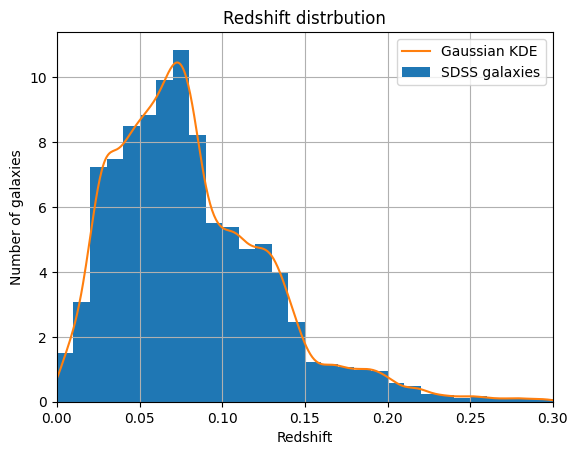

In [4]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, density=True, ax=ax, label="SDSS galaxies")
gal.z.plot.kde(ax=ax, label="Gaussian KDE")
y = np.histogram(gal.z, bins= 30, density=True)
print(y[0])
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(True)
plt.legend()
plt.savefig('z_kde.pdf', dpi=100);

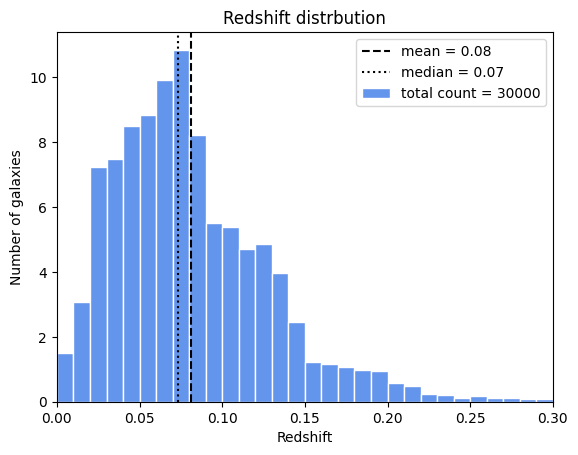

In [5]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, color='cornflowerblue', edgecolor='white', density=True, ax=ax, label=f"total count = {len(gal)}")
plt.axvline(np.mean(gal.z), linestyle='--', c='k', label=f"mean = {np.mean(gal.z):.2f}")
plt.axvline(np.median(gal.z), linestyle=':', c='k', label=f"median = {np.median(gal.z):.2f}")
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(False)
plt.legend()
plt.savefig('z_dist.pdf', dpi=100);

In [6]:
# class distribution

gal['class'].value_counts()

b'GALAXY'    29719
b'QSO'         281
Name: class, dtype: int64

In [7]:
# subclass distribution

gal['subclass'].value_counts()

b'STARFORMING'              13945
b'STARBURST'                12632
b'AGN'                       2040
b''                           905
b'AGN BROADLINE'              232
b'BROADLINE'                  107
b'STARBURST BROADLINE'        102
b'STARFORMING BROADLINE'       37
Name: subclass, dtype: int64

### BPT diagram

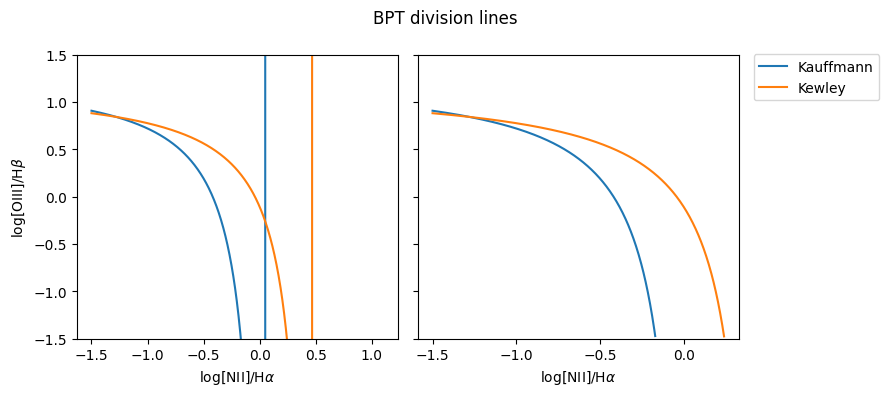

In [8]:
# BPT division lines

x = np.linspace(-1.5, 1.1, 1000)
y_kauffmann = 0.61/(x-0.05) + 1.3
y_kewley = 0.61/(x-0.47) + 1.19

fig, axs = plt.subplots(1,2, figsize=(9,4), sharey=True)

fig.suptitle("BPT division lines")

axs[0].plot(x, y_kauffmann, label="Kauffmann")
axs[0].plot(x, y_kewley, label="Kewley")
axs[0].set_ylim(-1.5, 1.5)
axs[0].set_xlabel(r"log[NII]/H$\alpha$")
axs[0].set_ylabel(r"log[OIII]/H$\beta$")

# division lines as a function to make it single valued in our limits

def kauffman(x):
    ## x lim was calculated for a y of -1.5
    return [0.61/(i-0.05) + 1.3 if (i < (0.61/(-1.5-1.3))+0.05) else -np.inf for i in x] 

def kewley(x):
   ## x lim was calculated for a y of -1.5 
   return [0.61/(i-0.47) + 1.19 if (i < (0.61/(-1.5-1.19))+0.47) else -np.inf for i in x] 

axs[1].plot(x, kauffman(x), label="Kauffmann")
axs[1].plot(x, kewley(x), label="Kewley")
axs[1].set_ylim(-1.5, 1.5)
axs[1].set_xlabel(r"log[NII]/H$\alpha$")
axs[1].tick_params(direction='out')

for i in range(1,len(axs)):
    axs[i].set_ylim( axs[0].get_ylim() ) # align axes
    #axs[i].set_yticks([])

plt.subplots_adjust(wspace=.01)
plt.legend(bbox_to_anchor=(1.025,1.025), loc='upper left')
fig.tight_layout()
fig.savefig('bpt_division.pdf', dpi=100);

In [9]:
# BPT classification

def bpt_classifier(df):
    df['x_BPT'] = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
    df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
    df['class_Kauffmann'] = np.where((df['y_BPT'] <= kauffman(df['x_BPT'])), "SFG", "QSO")
    df['class_Kewley'] = np.where((df['y_BPT'] <= kewley(df['x_BPT'])), "SFG", "QSO")
    df['class_BPT'] = np.where(((df['class_Kauffmann']=='SFG')&(df['class_Kewley']=='SFG')), "SFG", 
                                    np.where(((df['class_Kauffmann']=='QSO')&(df['class_Kewley']=='QSO')), "AGN", 
                                            "composite"))
    return df

def bpt_plt(df):

    fig = plt.figure()

    x = df['x_BPT']
    y = df['y_BPT']
    xy = np.vstack([x,y])
    df["kde"] = gaussian_kde(xy)(xy)

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges
                  }
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        x_sub = df_sub['x_BPT']
        y_sub = df_sub['y_BPT']
        z_sub = df_sub['kde']
        normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
        plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                    cmap=class_dict[class_gal], norm=normalize)
    
    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.subplots_adjust(hspace=.0)
    
    return fig

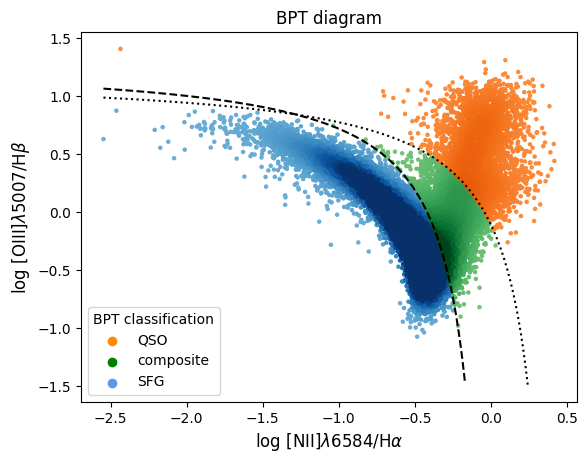

In [10]:
fig = bpt_plt(bpt_classifier(gal))
fig.savefig('bpt_classic.pdf', dpi=100);

SFG    27979
QSO     2021
Name: class_Kewley_si, dtype: int64


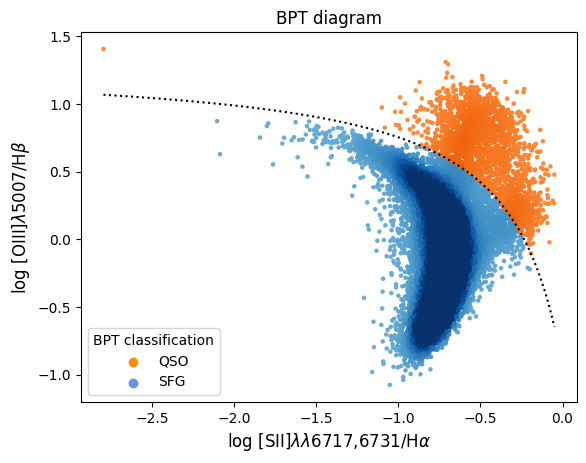

In [68]:
# BPT  diagram - [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα

df=gal

# division line as a function to make it single valued in our limits

def kewley_si(x):
   ## x was calculated for a y of -1.5
   return [0.72/(i-0.32) + 1.30 if (i < (0.72/(-1.5-1.3))+0.32) else -np.inf for i in x] 

df['x_BPT'] = np.log10(df['sii_6717_flux']/df['h_alpha_flux'])
df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
df['class_Kewley_si'] = np.where((df['y_BPT'] <= kewley_si(df['x_BPT'])), "SFG", "QSO")

print(df['class_Kewley_si'].value_counts())

fig = plt.figure()

x = df['x_BPT']
y = df['y_BPT']
xy = np.vstack([x,y])
df["kde"] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
                'QSO': plt.cm.Oranges
                }

for class_gal in class_dict.keys():
    df_sub = df[df['class_Kewley_si'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_BPT']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
plt.plot(x, kewley_si(x), 'k:', label="Kewley_si")

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter3 = plt.scatter([], [], c='darkorange', label="QSO")
plt.title('BPT diagram')
plt.legend((scatter3, scatter1), ["QSO", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')
plt.xlabel(r"log [SII]$\lambda$$\lambda$6717,6731/H$\alpha$", fontsize=12)
plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
plt.subplots_adjust(hspace=.0)

fig.savefig("bpt_oiii_sii.pdf", dpi=100);

SFG    25610
QSO     4390
Name: class_Kewley_oi, dtype: int64


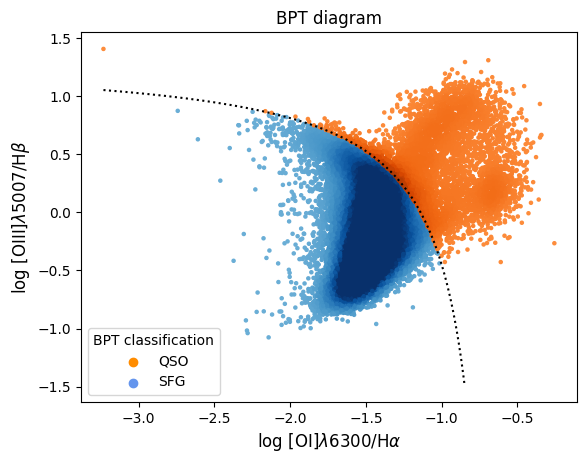

In [69]:
# BPT  diagram - [OIII]λ5007/Hβ vs. [OI]λ6300/Hα

df=gal

# division line as a function to make it single valued in our limits

def kewley_oi(x):
   ## x was calculated for a y of -1.5
   return [0.73/(i+0.59) + 1.33 if (i < (0.73/(-1.5-1.33))-0.59) else -np.inf for i in x] 

df['x_BPT'] = np.log10(df['oi_6300_flux']/df['h_alpha_flux'])
df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
df['class_Kewley_oi'] = np.where((df['y_BPT'] <= kewley_oi(df['x_BPT'])), "SFG", "QSO")

print(df['class_Kewley_oi'].value_counts())

fig = plt.figure()

x = df['x_BPT']
y = df['y_BPT']
xy = np.vstack([x,y])
df["kde"] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
                'QSO': plt.cm.Oranges
                }

for class_gal in class_dict.keys():
    df_sub = df[df['class_Kewley_oi'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_BPT']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
plt.plot(x, kewley_oi(x), 'k:', label="Kewley_oi")

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter3 = plt.scatter([], [], c='darkorange', label="QSO")
plt.title('BPT diagram')
plt.legend((scatter3, scatter1), ["QSO", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')
plt.xlabel(r"log [OI]$\lambda$6300/H$\alpha$", fontsize=12)
plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
plt.subplots_adjust(hspace=.0)

fig.savefig("bpt_oiii_oi.pdf", dpi=100);

### WHAN diagram

In [12]:
# WHAN classification

gal = bpt_classifier(gal)

gal['y_WHAN'] = np.abs(gal['h_alpha_eqw'])
gal['z_WHAN'] = np.abs(gal['nii_6584_eqw'])

gal['group_WHAN'] = np.where(((gal['z_WHAN']>0.5) & (gal['y_WHAN']>0.5)), "ELG", "lineless")

for i in gal.index:
    if gal.loc[i, 'y_WHAN'] > 0.5:
        if gal.loc[i, 'group_WHAN'] != "lineless":
            if gal.loc[i, 'y_WHAN'] > 3:
                if gal.loc[i, 'x_BPT'] > -0.4:
                    if gal.loc[i, 'y_WHAN'] > 6:
                        gal.loc[i, 'subclass_WHAN'] = "Seyfert"
                        gal.loc[i, 'class_WHAN'] = "AGN"
                    else:
                        gal.loc[i, 'subclass_WHAN'] = "wAGN"
                        gal.loc[i, 'class_WHAN'] = "LINER"
                else:
                    gal.loc[i, 'subclass_WHAN'] = "SFG" 
                    gal.loc[i, 'class_WHAN'] = "SFG"           
            else:
                gal.loc[i, 'subclass_WHAN'] = "RG"
                gal.loc[i, 'class_WHAN'] = "LINER"
        else:
            gal.loc[i, 'subclass_WHAN'] = "uncertain"
            gal.loc[i, 'class_WHAN'] = "uncertain"
    else:
        gal.loc[i, 'subclass_WHAN'] = "passive"

In [13]:
gal['group_WHAN'].value_counts()

ELG         29989
lineless       11
Name: group_WHAN, dtype: int64

In [14]:
gal['class_WHAN'].value_counts()

SFG          20809
AGN           8345
LINER          835
uncertain       11
Name: class_WHAN, dtype: int64

In [15]:
gal['subclass_WHAN'].value_counts()

SFG          20809
Seyfert       8345
wAGN           648
RG             187
uncertain       11
Name: subclass_WHAN, dtype: int64

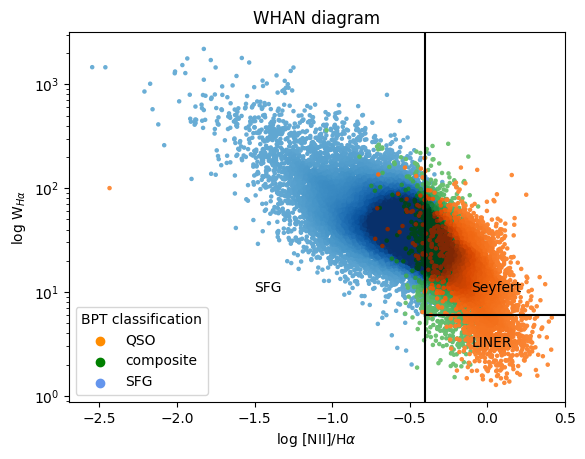

In [16]:
# WHAN diagram

df = gal
x = df['x_BPT']
y = np.log10(df['y_WHAN'])
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_WHAN']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

plt.axvline(x=-0.4, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate('Seyfert', xy=(-0.1,10), color='black')
plt.annotate('LINER', xy=(-0.1,3), color='black')
plt.annotate('SFG', xy=(-1.5,10), color='black')
plt.yscale('log')
plt.xlim(right=0.5)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")
plt.title("WHAN diagram")
plt.savefig('whan.pdf', dpi=100);

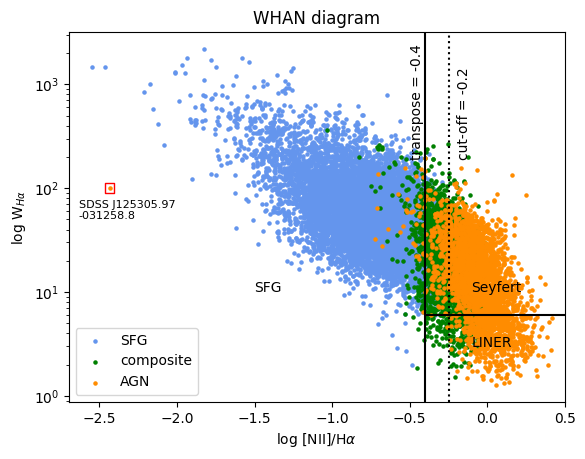

In [50]:
# WHAN diagram

df = gal

class_dict = {'SFG': 'cornflowerblue', 
              'composite': 'green', 
              'AGN': 'darkorange'
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_WHAN']
    plt.scatter(x_sub, y_sub, c=class_dict[class_gal], s=5, label=class_gal)
    if class_gal=='SFG':
        plt.axvline(np.max(df_sub['x_BPT']), ls=':', color='black')
        plt.annotate(f"cut-off = {np.max(df_sub['x_BPT']):.1f}", xy=(np.max(df_sub['x_BPT'])+0.05,200), rotation=90, color='black')

plt.axvline(x=-0.4, color='black')
plt.annotate("transpose = -0.4", xy=(-0.4-0.1,200), rotation=90, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate("Seyfert", xy=(-0.1,10), color='black')
plt.annotate("LINER", xy=(-0.1,3), color='black')
plt.annotate("SFG", xy=(-1.5,10), color='black')
plt.yscale('log')
plt.xlim(right=0.5)

#df_sub = df[df['group_WHAN'] == 'lineless']
#plt.scatter(df_sub['x_BPT'], df_sub['y_WHAN'], ec='red', fc='None', marker='o', s=50, label='uncertain')

df_sub = df[(df.class_BPT =='AGN') & (df.subclass_WHAN=='SFG') & (df.x_BPT<-2)]
plt.scatter(df_sub['x_BPT'], df_sub['y_WHAN'], ec='red', fc='None', marker='s', s=50)
plt.annotate('SDSS J125305.97\n-031258.8', xy=(df_sub['x_BPT']-0.2, df_sub['y_WHAN']-50), color='black', fontsize=8)

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")
plt.title("WHAN diagram")
plt.legend()
plt.savefig('whan_annotated.pdf', dpi=100);

In [18]:
gal[(gal.class_WHAN =='uncertain')]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,class_Kauffmann,class_Kewley,class_BPT,kde,class_Kewley_si,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
6038,424,51893,124,b'GALAXY',b'',0.051915,342.23110,105.00790,241.47890,39.650960,...,SFG,SFG,SFG,0.478623,SFG,51.211990,0.433846,lineless,uncertain,uncertain
7225,399,51817,355,b'GALAXY',b'',0.012659,63.95274,16.64981,17.17562,15.545620,...,SFG,SFG,SFG,0.003002,QSO,3.830764,0.449749,lineless,uncertain,uncertain
11358,519,52283,165,b'GALAXY',b'STARBURST',0.100150,160.69910,41.24368,21.36432,37.753170,...,SFG,SFG,SFG,1.844597,SFG,36.970360,0.373773,lineless,uncertain,uncertain
15625,678,52884,549,b'GALAXY',b'',0.032510,1618.49400,339.11660,248.90660,491.326400,...,SFG,SFG,SFG,2.822026,SFG,52.966190,0.099646,lineless,uncertain,uncertain
16540,691,52199,594,b'GALAXY',b'',0.193502,149.86440,33.99573,40.64509,32.656760,...,SFG,SFG,SFG,1.470695,QSO,56.620000,0.143819,lineless,uncertain,uncertain
16557,709,52205,79,b'GALAXY',b'STARBURST',0.029939,264.30350,96.82309,195.83810,6.336245,...,SFG,SFG,SFG,0.002266,SFG,41.393830,0.450224,lineless,uncertain,uncertain
17728,396,51816,237,b'GALAXY',b'STARBURST',0.100061,196.14560,49.47662,35.49763,63.273140,...,SFG,SFG,SFG,4.226509,SFG,41.128430,0.266877,lineless,uncertain,uncertain
21321,784,52327,332,b'GALAXY',b'STARBURST',0.258647,365.55470,104.81580,157.18580,62.712300,...,SFG,SFG,SFG,0.594443,SFG,85.894600,0.297303,lineless,uncertain,uncertain
21672,712,52179,120,b'GALAXY',b'STARFORMING',0.100279,161.46530,39.13628,23.73899,45.398560,...,SFG,SFG,SFG,2.819507,SFG,32.228550,0.445839,lineless,uncertain,uncertain
24375,749,52226,217,b'GALAXY',b'',0.101004,307.26930,83.53780,30.93728,104.040700,...,SFG,SFG,SFG,4.307059,SFG,41.054690,0.227207,lineless,uncertain,uncertain


In [19]:
gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG') & (gal.x_BPT<-2)]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,class_Kauffmann,class_Kewley,class_BPT,kde,class_Kewley_si,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
2811,337,51997,97,b'GALAXY',b'STARBURST',0.022723,1352901.0,25035.06,640257.3,4968.048,...,QSO,QSO,AGN,0.002227,QSO,100.2064,78.2348,ELG,SFG,SFG


In [20]:
print(f"SFG in BPT: {gal[(gal.class_BPT =='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nSFG in WHAN: {gal[(gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

SFG in BPT: 78.27666666666667 %
SFG in WHAN: 69.36333333333333 %


In [21]:
print(f"Composite in BPT, SFG in WHAN: {gal[(gal.class_BPT =='composite') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT, SFG in WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

Composite in BPT, SFG in WHAN: 0.6366666666666666 %
AGN in BPT, SFG in WHAN: 0.12666666666666665 %


In [22]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN: {gal[(gal.class_WHAN=='AGN')|(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.683333333333334 %
AGN in WHAN: 30.599999999999998 %


In [23]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nStrong AGN in WHAN: {gal[(gal.class_WHAN=='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.683333333333334 %
Strong AGN in WHAN: 27.816666666666666 %


In [24]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nLINER (wAGN & RG) in WHAN: {gal[(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 9.683333333333334 %
LINER (wAGN & RG) in WHAN: 2.7833333333333337 %


In [52]:
print(f"AGN in BPT and WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT but not WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN !='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN but not BPT: {gal[(gal.class_BPT !='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT and WHAN: 7.4399999999999995 %
AGN in BPT but not WHAN: 2.243333333333333 %
AGN in WHAN but not BPT: 20.37666666666667 %


## TASK 2 - TBT

In [169]:
# sdss query through astropy

with open('query_task2.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results_sub = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results_sub.to_csv('nlr_sub.csv', sep=',')

/home/ridha-mm/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [26]:
# our data

gal_sub = pd.read_csv('nlr_sub.csv', sep=',', index_col=0)
gal_sub

,plate,mjd,fiberid,z,subclass,e_bv_sfd,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,neiii_3869_flux,oii_3726_flux,oii_3729_flux,h_alpha_eqw,nii_6584_eqw,psfMag_g,psfMag_z
0,2870,54534,454,0.070994,b'STARBURST',0.026459,1925.0140,564.39490,1150.3790,226.16560,53.906320,261.88380,189.48640,86.83601,808.5032,853.76860,-267.67580,-31.646210,19.62440,20.46412
1,2886,54498,636,0.064423,b'STARFORMING',0.026963,409.7917,84.79642,190.8167,204.85760,17.734800,79.25798,50.73198,15.20359,51.6023,31.34161,-14.94207,-7.255168,18.68949,17.08159
2,2866,54478,544,0.167171,b'BROADLINE',0.024325,273.1649,108.86020,290.7308,48.95900,27.567260,57.03524,53.31462,25.48325,121.7389,73.31001,-24.26218,-4.779176,19.07868,18.07804
3,2881,54502,555,0.044106,b'STARFORMING',0.014189,1439.7670,456.59570,515.1502,740.45000,59.805350,290.04140,230.02220,82.92945,489.2700,375.55250,-39.86195,-20.876010,17.48463,16.57748
4,2881,54502,550,0.041868,b'STARBURST',0.014366,2849.8020,877.00070,1384.5710,640.89770,65.326030,380.17650,286.82010,103.89880,1552.6880,1311.61000,-130.42560,-29.417510,17.76833,17.33243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20869,2423,54149,188,0.037248,b'STARBURST',0.030904,998.5945,333.66430,1441.3650,38.37029,15.238360,72.13709,56.79886,126.32010,336.2098,385.47150,-195.14950,-8.332558,19.17060,19.02911
20870,2430,53815,117,0.075924,b'STARBURST',0.033041,9556.6400,2951.77700,17100.2900,363.37130,143.185500,539.21410,405.57090,1199.46300,2574.5780,2495.41500,-812.25090,-31.800390,17.80360,18.16362
20871,2430,53815,106,0.029359,b'STARBURST',0.031500,954.7469,276.38550,457.8134,125.70700,15.722250,144.66540,102.04540,34.19313,430.1756,470.34460,-81.68647,-10.946110,18.64104,18.13110
20872,2433,53820,272,0.029287,b'STARBURST',0.037403,364.4166,105.12640,275.1090,27.29181,9.744692,51.01603,38.60555,22.26134,180.7461,222.42570,-57.73418,-4.776728,19.39954,19.01816


### k-correction

In [27]:
# getting the variables

gal_sub = bpt_classifier(gal_sub)

gal_sub['(g-z)_extcor'] = gal_sub.apply(lambda x: ((x['psfMag_g'] - x['psfMag_z'] - (3.303-1.263)*x['e_bv_sfd'])), axis=1)
gal_sub['(g-z)_kcor'] = gal_sub.apply(lambda x: (x['(g-z)_extcor'] - calc_kcor(filter_name='g', redshift=x['z'], colour_name='g - z', colour_value=x['(g-z)_extcor'])), axis=1)
gal_sub['x_TBT'] = np.log10(gal_sub["neiii_3869_flux"]/gal_sub["oii_3726_flux"])

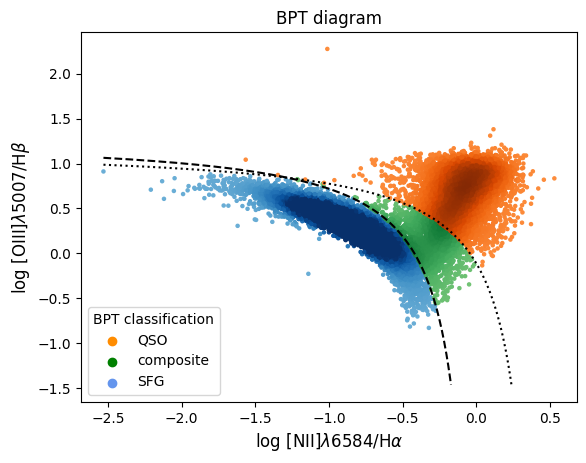

In [28]:
# corresponding BPT

fig = bpt_plt(bpt_classifier(gal_sub))
fig.savefig('tbt_bpt.pdf', dpi=100);

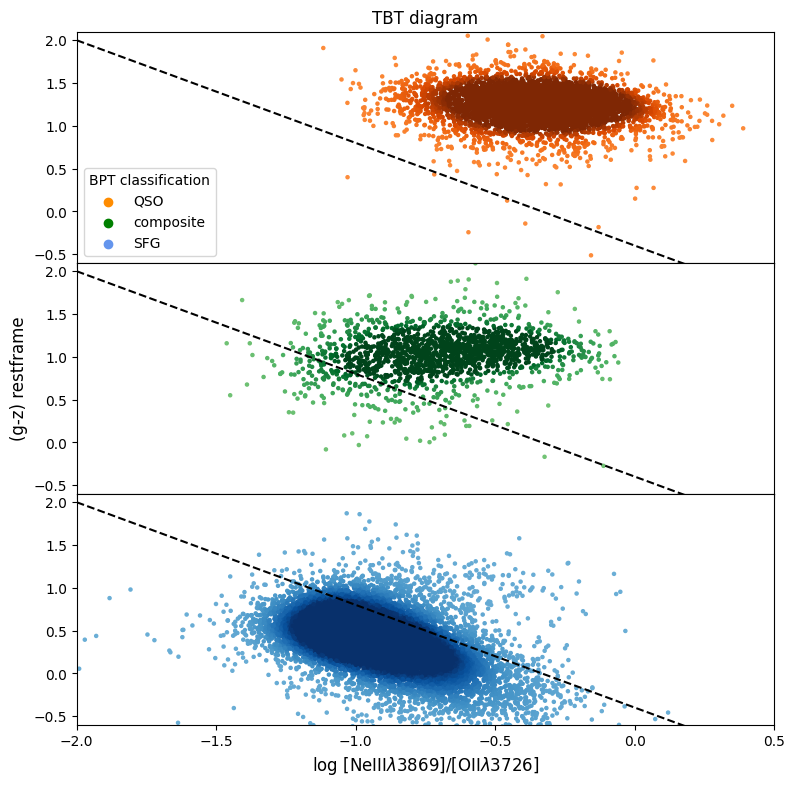

In [29]:
# TBT diagram

df = gal_sub

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(9,9), gridspec_kw=dict(height_ratios=[1, 1, 1]))


class_dict = {'SFG': plt.cm.Blues,
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }

def kde_plot(ax, df, class_gal):
    df_sub = df[df['class_BPT']==class_gal]
    x = df_sub['x_TBT']
    y = df_sub['(g-z)_kcor']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    ax.scatter(x, y, c=z, s=5, edgecolor=None, 
               cmap=class_dict[class_gal], norm=normalize, label=class_gal)

for ax, class_gal in zip(axs, list(class_dict.keys())[::-1]):
    kde_plot(ax, df, class_gal)
    x = np.linspace(-2, 0.5, 1000)
    y = -1.2*x - 0.4
    ax.plot(x, y, 'k--')
    ax.set_ylim(-0.6, 2.1)
    ax.set_xlim(-2, 0.5)

yticks = axs[2].yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
axs[0].set_title('TBT diagram')
axs[0].legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], loc='lower left', title='BPT classification', fontsize='medium')
axs[1].set_ylabel("(g-z) restframe", fontsize=12)
plt.xlabel(r"log [NeIII$\lambda$3869]/[OII$\lambda$3726]", fontsize=12)
plt.subplots_adjust(hspace=.0)
plt.savefig('tbt.pdf', dpi=100);

In [30]:
# TBT classifier

gal_sub['class_TBT'] = np.where(((gal_sub['(g-z)_kcor']) > (-1.2*gal_sub['x_TBT']-0.1)), 'AGN', 'other')

print(f"AGN in BPT: {gal_sub[(gal_sub.class_BPT =='AGN')].count()[0]/len(gal_sub) * 100} %"
      f"\nAGN in TBT: {gal_sub[(gal_sub.class_TBT =='AGN')].count()[0]/len(gal_sub) * 100}")

AGN in BPT: 26.588100028743895 %
AGN in TBT: 34.392066685829256


In [57]:
print(f"AGN in BPT and TBT: {gal_sub[(gal_sub.class_BPT =='AGN') & (gal_sub.class_TBT =='AGN')].count()[0]/len(gal_sub) * 100} %"+
      f"\nAGN in BPT but not TBT: {gal_sub[(gal_sub.class_BPT =='AGN') & (gal_sub.class_TBT !='AGN')].count()[0]/len(gal_sub) * 100} %"+
      f"\nAGN in TBT but not BPT: {gal_sub[(gal_sub.class_BPT !='AGN') & (gal_sub.class_TBT =='AGN')].count()[0]/len(gal_sub) * 100} %")

AGN in BPT and TBT: 26.473124461052027 %
AGN in BPT but not TBT: 0.11497556769186547 %
AGN in TBT but not BPT: 7.918942224777235 %


## TASK 3 - Colour-colour diagram (MIR)

In [179]:
# sdss query through astropy

with open('query_task3.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results_cross = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results_cross.to_csv('nlr_cross.csv', sep=',')

/home/ridha-mm/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [32]:
# our data

gal_mir = pd.read_csv('nlr_cross.csv', sep=',', index_col=0)
gal_mir = pd.merge(gal_mir, gal, on=['plate', 'mjd', 'fiberid'])
gal_mir = bpt_classifier(gal_mir)
gal_mir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25242 entries, 0 to 25241
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plate            25242 non-null  int64  
 1   mjd              25242 non-null  int64  
 2   fiberid          25242 non-null  int64  
 3   z_x              25242 non-null  float64
 4   subclass_x       25242 non-null  object 
 5   e_bv_sfd         25242 non-null  float64
 6   w1mpro           25242 non-null  float64
 7   w2mpro           25242 non-null  float64
 8   w3mpro           25242 non-null  float64
 9   w1flux           25242 non-null  float64
 10  w2flux           25242 non-null  float64
 11  w3flux           25242 non-null  float64
 12  class            25242 non-null  object 
 13  subclass_y       25242 non-null  object 
 14  z_y              25242 non-null  float64
 15  h_alpha_flux     25242 non-null  float64
 16  h_beta_flux      25242 non-null  float64
 17  oiii_5007_fl

In [33]:
# extinction correction

R_w1w2 = 0.056 ## source: https://arxiv.org/abs/2210.15918
R_w2w3 = -0.045

gal_mir['w1-w2'] = gal_mir['w1mpro'] - gal_mir['w2mpro'] - (R_w1w2 * gal_mir['e_bv_sfd'])
gal_mir['w2-w3'] = gal_mir['w2mpro'] - gal_mir['w3mpro'] - (R_w2w3 * gal_mir['e_bv_sfd'])

gal_mir['x_mat'] = np.log10(gal_mir['w3flux']/gal_mir['w2flux'])
gal_mir['y_mat'] = np.log10(gal_mir['w2flux']/gal_mir['w1flux'])

In [34]:
# WISE classification

gal_mir['class_WISE'] = np.where((gal_mir['w1-w2'] >= 0.8), 'AGN', 
                                 (np.where((gal_mir['w2-w3'] <= 2), 'Spheroids', 
                                           (np.where(((gal_mir['w2-w3'] <= 3.5) & (gal_mir['w2-w3'] > 2)), 'Intermediate disks', 
                                                     (np.where((gal_mir['w2-w3'] > 3.5), 'SF disks', '')))))))

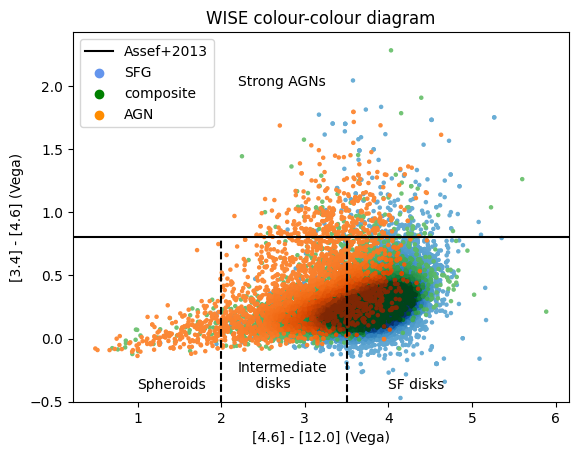

In [35]:
# WISE colour-colour plot

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub["kde"]
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

plt.axhline(y=0.8, c='k', label="Assef+2013")
plt.vlines(x=2, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.vlines(x=3.5, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.annotate('Strong AGNs', xy=(2.2,2), color='black')
plt.annotate('Spheroids', xy=(1,-0.4), color='black')
plt.annotate('Intermediate\n    disks', xy=(2.2,-0.39), color='black')
plt.annotate('SF disks', xy=(4,-0.4), color='black')
plt.ylim(bottom=-0.5)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram")

plt.legend()
plt.savefig('wise_cc.pdf', dpi=100);

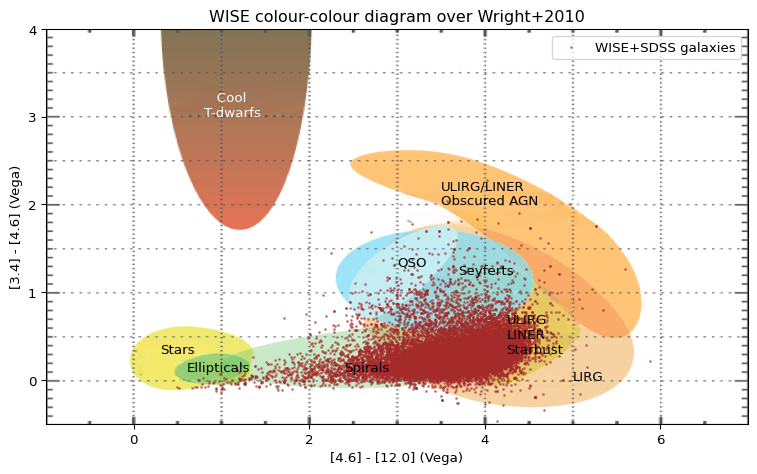

In [36]:
# c-c plot over Wright+2010

fig = plt.figure(figsize=(566*2/120, 622*2/120), dpi=96)

img = plt.imread('wright+2010_cleanup.png')
plt.imshow(img, zorder=0, extent=[-1.009, 7, -0.510, 4], alpha=0.75, aspect='equal')

plt.scatter(gal_mir['w2-w3'], gal_mir['w1-w2'],  color='brown', marker='.', alpha=0.5, s=5, zorder=1, label='WISE+SDSS galaxies')
plt.annotate('   Cool\nT-dwarfs', xy=(0.8,3), color='white')
plt.annotate('Ellipticals', xy=(0.6,0.1), color='black')
plt.annotate('Stars', xy=(0.3,0.3), color='black')
plt.annotate('Spirals', xy=(2.4,0.1), color='black')
plt.annotate('QSO', xy=(3,1.3), color='black')
plt.annotate('Seyferts', xy=(3.7,1.2), color='black')
plt.annotate('ULIRG\nLINER\nStarbust', xy=(4.25,0.3), color='black')
plt.annotate('LIRG', xy=(5,0), color='black')
plt.annotate('ULIRG/LINER\nObscured AGN', xy=(3.5,2), color='black')

plt.xlim(-1,7)
plt.xticks(np.arange(0, 7, 2))
plt.yticks(np.arange(0, 5, 1))
plt.ylim(-0.5,4)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram over Wright+2010")

plt.legend()
plt.savefig('wise_wright+2010.pdf', dpi=100);

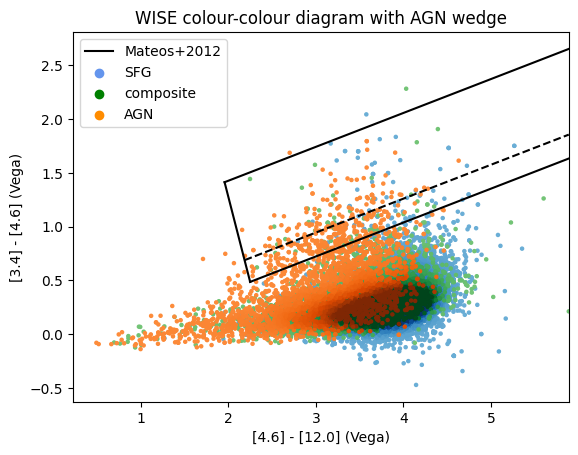

In [55]:
# c-c plot with AGN wedge Matteos+2012

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-', label='Mateos+2012')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.legend()
plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge")
plt.savefig("wise_wedge.pdf", dpi=100);

In [38]:
# WHAN classification
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)

def y_top(x): return 0.315*x+0.796 if x>=x_top else -np.inf
def y_bot(x): return 0.315*x-0.222 if x>=x_bot else -np.inf
def y_lim(x): return -3.172*x+7.624 if x>=x_top and x<=x_bot else -np.inf

for i, x, y in zip(gal_mir.index, gal_mir['w2-w3'], gal_mir['w1-w2']):
    if y <= y_top(x) and y > y_lim(x) and y > y_bot(x):
        gal_mir.loc[i, 'class_Mateos'] = "AGN"
    else:
        gal_mir.loc[i, 'class_Mateos'] = "other"
        
gal_mir['class_Mateos'].value_counts()

other    24772
AGN        470
Name: class_Mateos, dtype: int64

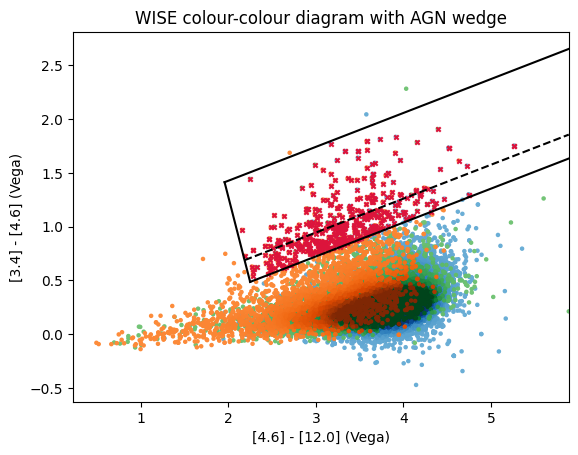

In [39]:
# c-c plot with AGN wedge Matteos+2012 checking classification is right

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

df_sub = df[df['class_Mateos'] == 'AGN']
plt.scatter(df_sub['w2-w3'], df_sub['w1-w2'],  color='crimson', marker='x', s=10, zorder=1)

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge");

In [58]:
gal_mir[(gal_mir.plate==337) & 	(gal_mir.mjd==51997) & (gal_mir.mjd==97)]

,plate,mjd,fiberid,z_x,subclass_x,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,...,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN,w1-w2,w2-w3,x_mat,y_mat,class_WISE,class_Mateos


In [40]:
print(f"AGN in BPT: {gal_mir[(gal_mir.class_BPT =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE: {gal_mir[(gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos: {gal_mir[(gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT: 10.466682513271532 %
AGN in WISE: 2.697884478250535 %
AGN in Mateos: 1.8619760716266538 %


In [60]:
print(f"AGN in BPT and WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and WISE: 1.4024245305443308 %
AGN in BPT but not WISE: 9.0642579827272 %
AGN in WISE but not BPT: 1.2954599477062039 %


In [59]:
print(f"AGN in BPT and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and Mateos: 1.3033832501386577 %
AGN in BPT but not Mateos: 9.163299263132874 %
AGN in Mateos but not BPT: 0.5585928214879963 %


In [64]:
print(f"AGN in BPT, WISE and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT, WISE and Mateos: 1.0775691308137232 %


In [66]:
print(f"\nAGN in WISE and Mateos: {gal_mir[(gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")


AGN in WISE and Mateos: 1.6123920450043578 %


## MISC

In [12]:
# sdss query through astropy

with open('query_joint.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results_sub = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results_sub.to_latex('sample.tex')

/home/ridha-mm/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
